## Лабораторна робота №2.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [33]:
dataset = pd.read_csv('titanic.csv')
dataset.info()

print(str(dataset.shape[0]) + " - строк")
print(str(dataset.shape[1]) + " - столбцов")

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
891 - строк
12 - столбцов


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [34]:
dataset = pd.read_csv('titanic.csv')
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки: щоб визначити кількість пропущених значень по кожному атрибуту я спочатику використав метод isnull() котра вертає True для кожного пропущеного значення атрибута, далі методом sum знаходжу кількість пропущених значень для кожного атрибуту за допомогою суми кількості елементів True.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



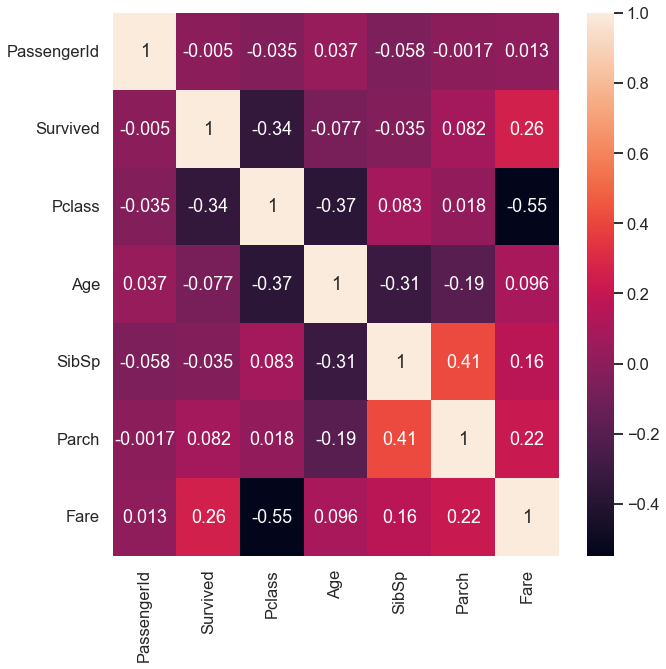

In [36]:
dataset = pd.read_csv('titanic.csv')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), cbar=True, annot=True)

plt.show()

Ваші висновки:Я побудував теплокарту кореляції, де чим вище кореляція тим ближче колір до білого. Дивлячись на цю теплокарту зрозуміло що атрибути SibSp і Parch добре корелюють (0.41), адже SibSp - це кількість братів, сестер та подружжя, а Parch - це кількість батьків та дітей. Також я знайшов залежність атрибутів Survived і Fare (0.26), що означає що виживання залежало від суми тарифу. Найгірше корелюють між собою сума тарифу(Fare) і клас(Pclass) пасажиру(-0.55)

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [37]:
def fill_empty(d_set, gr_list, arg):
    ds1 = d_set.groupby(by=gr_list).median()
    for j in range(d_set[d_set[arg].isna()][arg].size):
        ds2 = ds1
        ind = d_set[d_set[arg].isna()][arg].index[0]
        for i in range(len(gr_list)):
            if i == 0:
                ds2 = ds2.loc[dataset.at[ind, gr_list[i]], arg]
            else:
                ds2 = ds2.loc[dataset.at[ind, gr_list[i]]]
        d_set.loc[ind, arg] = ds2

dataset = pd.read_csv('titanic.csv')
argument = "Age"
group_list = ["Sex", "Survived", "Pclass"]
fill_empty(dataset, group_list, "Age")
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки: Мною була написана функція котра заповнює пропущені значення числових атрибутів за допомогою медіани за групами. Спочатку за допомогою списку групуючих колонок я групую значення датасету, потім по кожній групі знаходжу медіану. Далі взнаходжу пропущений елемент та визначаюсь з тим до якої групи він належить, в кінці замінюю пропущеня значення на значення медіани цієї групи. Таким чином я заповнив пропуски агрументу "Age".

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





<function matplotlib.pyplot.show(close=None, block=None)>

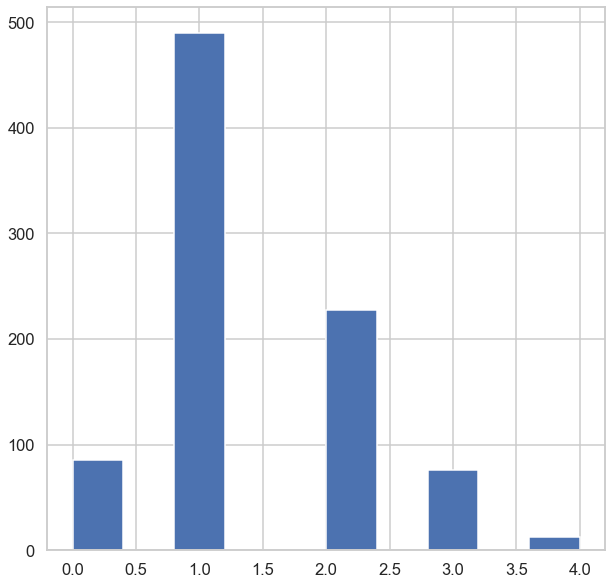

In [38]:
dataset["Age_bin"] = dataset["Age"].transform(lambda x: x // 16 if x < 80 else 4)
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(dataset["Age_bin"])

plt.show

Ваші висновки: Я перетворив безперервні значення "Age" в категоріальні, для котрих створив нову колонку "Age_bin". Результат відобразив на графіку.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [39]:
dataset["Fare_bin"] = pd.qcut(dataset["Fare"], 5, labels=False)
dataset[["Fare_bin", "Fare"]].head(10)

dataset.groupby(by="Fare_bin")["Survived"].sum()

Fare_bin
0     39
1     37
2     73
3     80
4    113
Name: Survived, dtype: int64

Ваші висновки: Гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної "Fare" відрізняється є правдою, а отже чим дорожче пасажир заплатив за тариф тим більше шансів на виживання у нього було. 

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [40]:
dataset["Family_size"] = dataset.SibSp + dataset.Parch
dataset["Alone"] = dataset.Family_size == 0

dataset.groupby(by="Family_size")["Survived"].sum() / (dataset.groupby(by="Family_size")["Survived"].count() / 100)


Family_size
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

Ваші висновки: Гіпотеза про виживання пасажирів залежіть від кількості членів їх сім'ї підтвердилась при збільшені кількості членів сім'ї до 4 ймовірність виживання виростає(0 - членів сім'ї 30% ймовірність, 3 - 72%), а с 4 і більше зменьшується. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [41]:
dataset = dataset.drop(["Name", "Ticket", "PassengerId", "Cabin", "Parch", "SibSp"], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     889 non-null    object 
 6   Age_bin      891 non-null    float64
 7   Fare_bin     891 non-null    int64  
 8   Family_size  891 non-null    int64  
 9   Alone        891 non-null    bool   
dtypes: bool(1), float64(3), int64(4), object(2)
memory usage: 63.6+ KB


Ваші висновки: Я видалив атрибут "Cabin" оскільки він має багато пропусків, також я видалив атрибути "Name", "Ticket", "PassengerId" оскільки вони оскільки вони рандомними і не є інформативними для подальшого аналізу. Також я видалив "Parch", "SibSp" так як вони є подібними і їх сума "Family_size" залишилася.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [42]:
def func(x):
    if x == "S" or x == 1:
        return 1
    if x == "C" or x == 2:
        return 2
    else:
        return 3
dataset["Sex"] = dataset["Sex"].transform(lambda x: 1 if x == "male" or x == 1 else 0)
dataset["Embarked"] = dataset["Embarked"].transform(lambda x: func(x))
#dataset["Sex"].head(10)
dataset[["Sex", "Survived", "Pclass", "Embarked"]].head(10)

,Sex,Survived,Pclass,Embarked
0,1,0,3,1
1,0,1,1,2
2,0,1,3,1
3,0,1,1,1
4,1,0,3,1
5,1,0,3,3
6,1,0,1,1
7,1,0,3,1
8,0,1,3,1
9,0,1,2,2


Ваші висновки: я перетворив значення даних змінних з символьних на числові за допомогою метода transform та лямбда функцій.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



<function matplotlib.pyplot.show(close=None, block=None)>

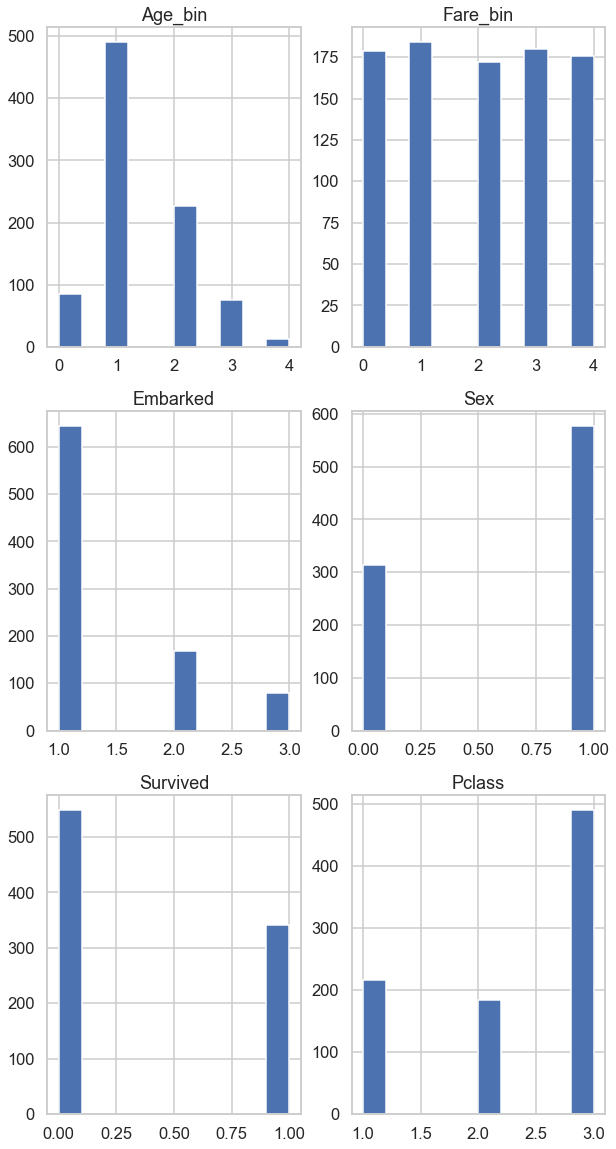

In [43]:
#dataset[["Survived", "Sex", "Age_bin", "Embarked", "Fare_bin"]].head(10)
fig, ax = plt.subplots(figsize=(10, 20))

plt.subplot(3, 2, 1)
plt.hist(dataset["Age_bin"]) 
plt.title("Age_bin")

plt.subplot(3, 2, 2)
plt.hist(dataset["Fare_bin"]) 
plt.title("Fare_bin")

plt.subplot(3, 2, 3)
plt.hist(dataset["Embarked"]) 
plt.title("Embarked")

plt.subplot(3, 2, 4)
plt.hist(dataset["Sex"]) 
plt.title("Sex")

plt.subplot(3, 2, 5)
plt.hist(dataset["Survived"]) 
plt.title("Survived")

plt.subplot(3, 2, 6)
plt.hist(dataset["Pclass"])
plt.title("Pclass")

plt.show

Ваші висновки: Я побудував діаграмму розподілу всіх категоріальних змінних

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

<function matplotlib.pyplot.show(close=None, block=None)>

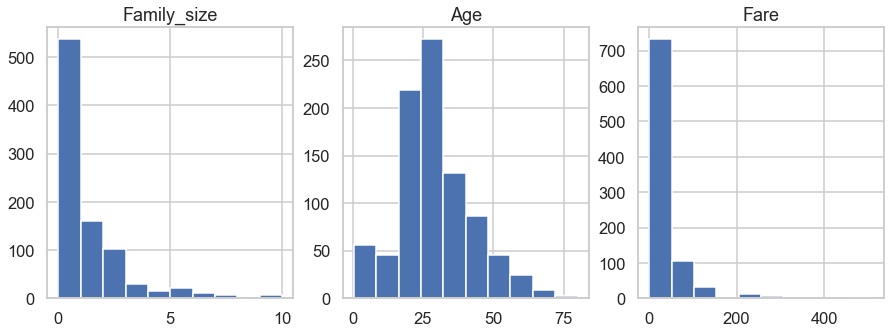

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(dataset["Family_size"])
plt.title("Family_size")

plt.subplot(1, 3, 2)
plt.hist(dataset["Age"])
plt.title("Age")

plt.subplot(1, 3, 3)
plt.hist(dataset["Fare"])
plt.title("Fare")

plt.show

Ваші висновки:Я побудував діаграмму розподілу всіх залишившихся числових змінних. Інші числові змінні були представлені по іншому або були нерелевантними.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

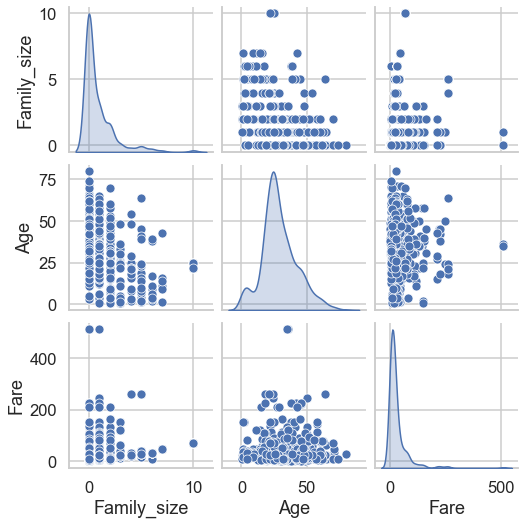

In [49]:
ds2 = dataset[["Family_size", "Age", "Fare"]]
sns.pairplot(ds2, palette="Set2", diag_kind="kde")

#g = sns.PairGrid(ds2)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

Ваші висновки:Я використовував змінні "Family_size", "Age", "Fare" для отримання співвідношення між ними. Співвідношення "Family_size" і "Age" дає зрозуміти що чим молодше людина тим більше з нею сім'ї на борту. По співвідношенню "Family_size" і "Fare" зрозуміло що пасажири с меньшим кількістью членів сім'ї платили більше. Співвідношення "Age" і "Fare" показує що найбільше платили люди середнього віку а мололді і старі платили меньше.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.